# HW 04-4. Random Number Generation

## T1. Monte Carlo Method를 이용한 $\pi$ 값 구하기
강의자료 - 확률이론 Review - 에서 설명한 Monte-Carlo Method를 이용한 $\pi$ 값 계산을  
### 수행할 작업
1. estimate_PI() 함수를 완성하라
>* Parameter : N_total은 생성할 전체 point의 개수이다 
>* Return : Monte-Carlo Method에 의해 추정된 (Estimated) $\pi$ 값 
>* 참고 : Form input N_test는 estimate_PI() test를 위한 입력 값이다
>> [0,1) 사이의 random 값 생성을 위해 [numpy.random()](https://docs.python.org/dev/library/random.html#random.random) 사용할 수도 있다.

In [2]:
import numpy as np
import scipy.stats as stats

def estimate_PI(N_total) :
  # scipy.stats을 이용하지 않고 numpy.random을 이용해서 생성할 수도 있음
  # Xs = np.random.random(N_total)
  # Ys = np.random.random(N_total)
  Xs = stats.uniform.rvs(size=N_total) 
  Ys = stats.uniform.rvs(size=N_total)

  #========== ENTER YOUR CODE ================= 
  return np.count_nonzero(np.power(Xs, 2) + np.power(Ys, 2) <= 1) / N_total * 4
  #============================================

N_test = 100000 #@param {type:"integer"}
print(f'Estimated PI = {estimate_PI(N_test)}')

Estimated PI = 3.14032


2. 여러 N 값들에 대해 다음의 예와 같은 그래프 그리기
>* Form input Ns로 주어지는 값들은 수행할 Monte-Carlo 실험 횟수다
>* 1.에서 작성한 estimate_PI() 함수를 사용하여 PI 값들을 구하고 아래 예와 같은 그래프를 그린다.
>* 그래프 x 축의 값이 log-scale임에 유의하라
>* 제목(Title)과 범례(legend)를 적용하여야 한다
>* 생성 random number에 따라 그래프의 모양은 다를 수 있다
![Example Graph](https://github.com/inetguru/IDS-CB35533/blob/main/monte_pi.png?raw=true)

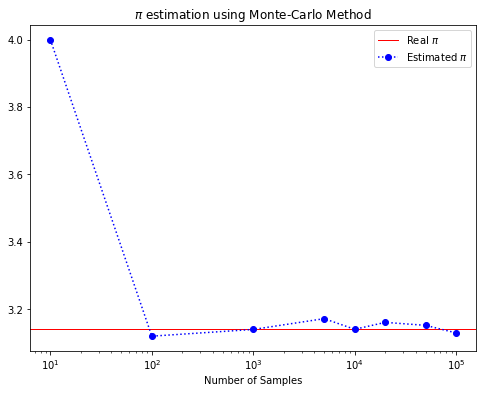

In [100]:
import matplotlib.pyplot as plt
import math
Ns = [10, 100, 1000, 5000, 10000, 20000, 50000, 100000] #@param {type:"raw"}

plt.rcParams['figure.figsize'] = [8,6]
#========== ENTER YOUR CODE ================= 
plt.axhline(y=math.pi, color='r', linewidth=1, label = 'Real $\pi$')
plt.plot(Ns, [estimate_PI(i) for i in Ns], ":ob", label="Estimated $\pi$")
plt.xscale("log")
plt.xlabel("Number of Samples")
plt.title("$\pi$ estimation using Monte-Carlo Method")
plt.legend()
#============================================ 
plt.show()

##T2. Histogram의 Bins 이해
* 아래 그림은 Histogram에서 Bins의 의미와 속성을 개괄적으로 보이고 있다.

![figure](https://mk0codingwithmaxskac.kinstacdn.com/wp-content/uploads/2019/12/histogram-example-daily-steps-taken-annotated.png)

* Histogram과 관련한 다음 두 가지 함수의 Reference를 확인하고 사용법을 이해하라.
>* [numpy.histogram](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html?highlight=histogram#numpy.histogram)
>* [matplotlib.pyplot.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist)

* 우리는 주어진 Vals 값에 대해 Bins를 변경하며 두 개 histogram을 그리려 한다

### 수행할 작업
#### **ax1**
1. bin의 수가 9개인 히스토그램을 ax1에 그려라. 
2. 2번째 bin 구간의 범위 [b2_start,b2_end)라 할 때 시작 값이 b2_start와 끝 값인 b2_end 값을 구하라 : 
> * b2_start = <font color='blue'>1.7</font>
> * b2_end = <font color='blue'>2.7</font>
3. Vals[5]인 2.7은 몇 번째 bin에 속하는가? <font color='blue'>3번째</font>

#### **ax2**
1. Bins 구분 값을 [0.0, 2.0, 3.0, 6.0, 10.0]로 하여 히스토그램을 ax2에 그려라.

다음은 기대하는 결과 그래프의 모습이다. 

![histogram](https://github.com/inetguru/IDS-CB35533/blob/main/histo.png?raw=true)


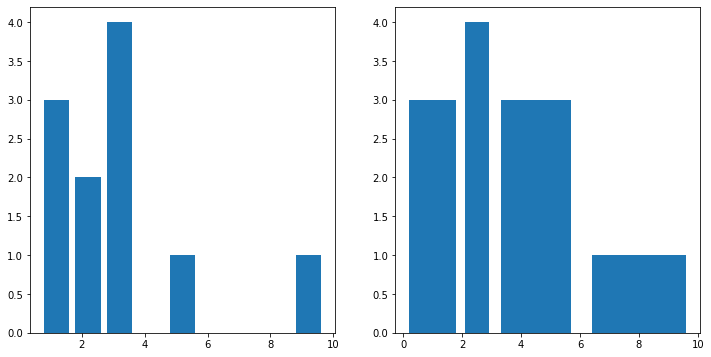

In [44]:
import numpy as np
import matplotlib.pyplot as plt
Vals = np.array([0.7, 1.0, 1.5, 2.3, 2.5, 2.7, 2.9, 3.0, 3.1, 5.5, 9.7])

plt.rcParams['figure.figsize'] = [12,6]
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#========== ENTER YOUR CODE ================= 
counts1, bins1 = np.histogram(Vals, bins = 9)
#print(counts1)
#print(bins1)
ax1.hist(bins1[:-1], bins1, weights=counts1, rwidth=0.8)
#ax1.hist(Vals, rwidth=0.8, bins=9)
ax2.hist(Vals, rwidth=0.8, bins=[0.0, 2.0, 3.0, 6.0, 10.0])
#============================================ 

plt.show()

## T3. Binomial을 따르는 Random Number Generation 실험

Binomial Random Variable을 따르는 난수를 생성하고 그 결과가 이론과 얼마나 유사한지 비교해 보려한다. 
프로그램의 개괄적 구성은 다음과 같다.
* $n=10, p=0.3$인 Binomial Random Variable을 위한 rv 변수를 생성한다.
* 사용자가 입력한 size 개수 만큼의 난수를 생성하여 rvals1에 저장한다.
* size * 10 만큼의 난수를 생성하여 rvals2에 저장한다.
* 난수 생성 결과 rvals1과 rvals2에서 Binomial Random Variable이 가질 수 있는 모든 값에 대해 도수 분포를 구하고 비율을 구한다. 예를 들어 전체 100개의 난수 중 0의 값을 가지는 것이 3개라면 0에 대한 도수 분포 비율은 0.03이 된다.
* 난수 생성 결과의 도수 분포 비율을 이론적인 확률값과 비교하는 그래프를 그린다.
>* histogram의 인자를 조정하여 도수 분포의 비율이 나타나도록 해보라
>* plt.hist() 함수를 사용하는 것이 불편하면 bar graph를 사용하여도 된다. 
>* 이론적인 확률 값 $P_X (k), k \in {0, 1, 2, \cdots, 10}$은 pmf()를 이용하여 구해서 plot() 함수로 표시하였다.

### 수행할 일
1. 다음 그림과 같은 결과 그래프를 얻도록 주어진 코드를 수정하라. 
2. Title, xlabel, ylabel, legend 등에 유의하라. 
![graph](https://github.com/inetguru/IDS-CB35533/blob/main/bin_rng.png?raw=true)

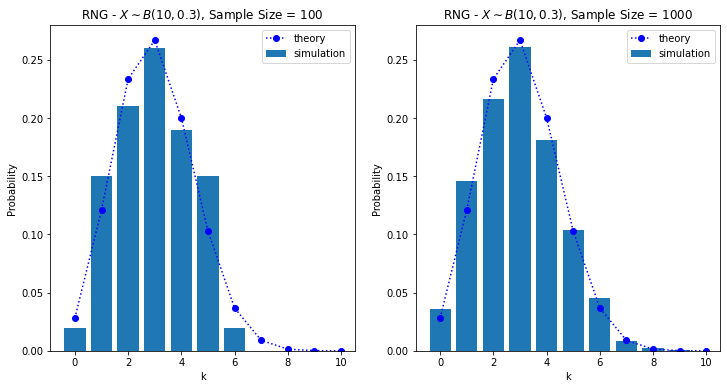

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(seed=1000)
n=10
p=0.3
size = 100#@param {type:"integer"}

rv = stats.binom(n,p)
Ks = np.arange(0,n+1)

rvals1 = rv.rvs(size=size)
rvals2 = rv.rvs(size=size*10)

plt.rcParams['figure.figsize'] = [12,6]
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#========== ENTER YOUR CODE ================= 

ax1.plot(Ks, rv.pmf(Ks), 'b:o', label='theory')
ax1.hist(rvals1, Ks - 0.5, density=True, rwidth=0.8, label="simulation")
ax1.set_title(f"RNG - $X \sim B({n}, {p})$, Sample Size = ${size}$")
ax1.set_xlabel("k")
ax1.set_ylabel("Probability")
ax1.legend()

ax2.plot(Ks, rv.pmf(Ks), 'b:o', label='theory')
ax2.hist(rvals2, Ks - 0.5, density=True, rwidth=0.8, label="simulation")
ax2.set_title(f"RNG - $X \sim B({n}, {p})$, Sample Size = ${size * 10}$")
ax2.set_xlabel("k")
ax2.set_ylabel("Probability")
ax2.legend()
#============================================ 

plt.show()

## T4. Gaussian을 따르는 Random Number Generation 실험
Gaussian Random Variable을 따르는 난수를 생성하고 그 결과가 이론과 얼마나 유사한지 비교해 보려한다. 
프로그램의 개괄적 구성은 다음과 같다.
* $\mu=0, \sigma=1$인 Standard Normal Random Variable을 위한 rv 변수를 생성한다.
* 사용자가 입력한 size 개수 만큼의 난수를 생성하여 rvals1에 저장한다.
* size * 10 만큼의 난수를 생성하여 rvals2에 저장한다.
* bins = np.linspace(-4\*sigma, 4\*sigma, 41)로 [-4\*sigma, 4\*sigma]의 구간을 40개의 bins로 구분하여 난수의 도수 분포를 구한다. 
* 난수 생성 결과의 도수 분포 비율을 이론적인 확률값과 비교하는 그래프를 그린다.
>* 개별 bins 폭이 1이 아니라서 histogram 함수 인자의 단순 조절만으로는 도수 분포 비율을 얻기는 어려움에 유의하라. 
>* plt.hist() 함수를 사용하는 것이 불편하면 bar graph를 사용하여도 된다. 
>* 이론적인 확률 값은 개별 cdf()를 이용해서 각 bins 구간별 확률을 구하였고 이를 plot() 함수로 표시하였다. 

### 수행할 일
1. 다음 그림과 같은 결과 그래프를 얻도록 주어진 코드를 수정하라. 
2. Title, xlabel, ylabel, legend 등을 포함하라. 
![graph](https://github.com/inetguru/IDS-CB35533/blob/main/gaussian_rng.png?raw=true)


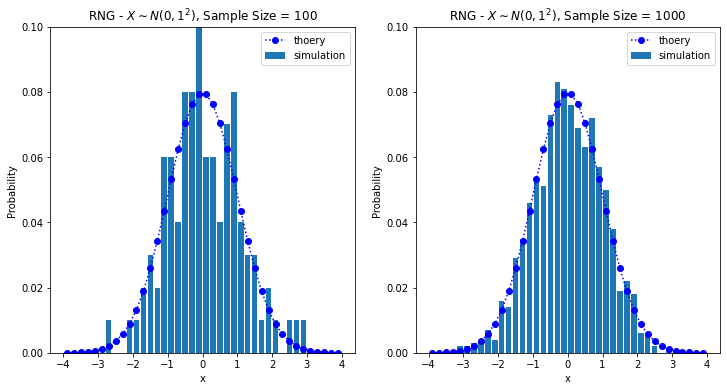

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(seed=1000)
mu = 0
sigma = 1

size = 100#@param {type:"integer"}

rv = stats.norm(mu,sigma)
bins = np.linspace(-4*sigma, 4*sigma, 41)

rvals1 = rv.rvs(size=size)
rvals2 = rv.rvs(size=size*10)

plt.rcParams['figure.figsize'] = [12,6]
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#========== ENTER YOUR CODE ================= 

ax1.plot((bins[1:]+bins[:-1])/2, rv.cdf(bins[1:])-rv.cdf(bins[:-1]), 'b:o', label='thoery')
ax1.hist(rvals1, bins, rwidth=0.8, label="simulation", weights=[1/size]*size)
ax1.set_title(f"RNG - $X \sim N({mu}, {sigma}^2)$, Sample Size = ${size}$")
ax1.set_xlabel("x")
ax1.set_ylabel("Probability")
ax1.set_ylim(top=0.1)
ax1.legend()

ax2.plot((bins[1:]+bins[:-1])/2, rv.cdf(bins[1:])-rv.cdf(bins[:-1]), 'b:o', label='thoery')
ax2.hist(rvals2, bins, rwidth=0.8, label="simulation", weights=[0.1/size]*(size * 10))
ax2.set_title(f"RNG - $X \sim N({mu}, {sigma}^2)$, Sample Size = ${size * 10}$")
ax2.set_xlabel("x")
ax2.set_ylabel("Probability")
ax2.set_ylim(top=0.1)
ax2.legend()

#============================================ 

plt.show()

## T5. Central Limit Theorem Simulation
이 문제에서는 중심극한정리(Central Limit Theorem)의 유효성을 Simulation을 통해 확인해 보려한다.

* $\lambda=2$인 Exponential Distribution을 따르는 표본을 난수 발생기를 이용하여 생성한다.
* 각 표본 크기는 n_sample이며 우리는 이러한 표본을 n_exp만큼 생성하고자 한다. 즉 rvs(n_sample \* n_exp)를 호출하여 n_sample \* n_exp 만큼의 난수를 생성한다.
* [numpy.reshape](https://www.w3schools.com/python/numpy/numpy_array_reshape.asp) 를 이용하여 생성한 난수들을 표본 크기가 n_sample인 n_exp개의 표본으로 변형한 2차원 배열 rval_array로 저장한다.
* 개별 표본의 표본평균(Sample Mean)을 구하여 xbars에 저장하였다.
* 우리는 이 표본평균의 분포에 근사하는 정규분포를 위한 변수인 g_rv를 만들려고 한다. 
* 우리는 결과를 그래프를 통해 확인하려한다. 
* ax1에는 생성한 난수 값 전체(개수 : n_sample * n_exp)의 분포를 exponential 분포의 이론적 확률값과 비교하여 표시한다.
* ax2에는 표본 평균의 분포를 표시하는데 표본 평균 $\bar X$ 의 도수 분포 비율을 histogram으로 표시하고 이에 근사하는 정규 분포의 확률값을 함께 표현하려 하였다. 

### 수행할 일
1. Central Limit Theorem에 따라 Sample Mean, $\bar X$의 분포를 위한 정규분포 g_rv의 인자를 알맞게 설정하라. 인자를 적절히 설정하면 결과가 n_sample = 5 인 상황에서 결과가 아래 그래프와 유사할 것이다.
2. ax1에서 확인할 수 있는 난수 전체의 분포는 정규분포와 전혀 닮지 않았다. ax2에서 확인할 수 있는 Sample Mean의 분포는 어떠한가? n_sample 값을 바꿔가며 n_sample 크기가 결과에 미치는 영향을 이해해 보라. (별도로 설명을 덧붙일 필요는 없음. 평가의 관점에서는 위 1.만 수행하면 됨)

![graph](https://github.com/inetguru/IDS-CB35533/blob/main/central.png?raw=true)

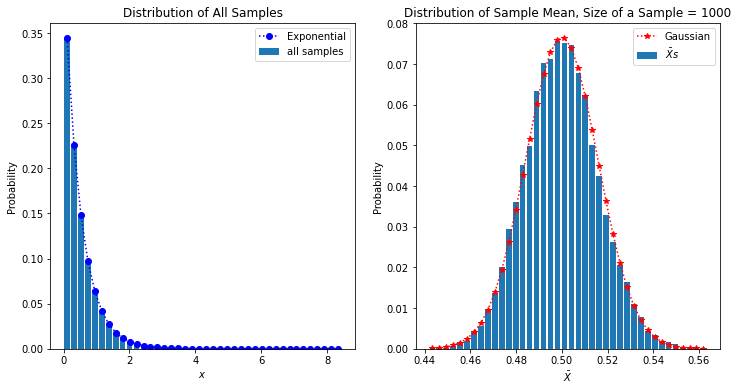

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

np.random.seed(seed=1000)
n_sample =  1000#@param {type:"integer"}
n_exp = 10000
Rate = 2

s_rv = stats.expon(scale = 1/Rate)

#========== SET THE PARAMETERS PROPERLY ================= 
# 중심극한정리: 기댓값 mu, sigma/root(n)인 정규분포에 수렴)
g_rv = stats.norm(1/Rate, 1/Rate/math.sqrt(n_sample))
#========================================================

rval_array = s_rv.rvs(n_sample * n_exp).reshape((n_exp, n_sample))
xbars = rval_array.mean(1)

plt.rcParams['figure.figsize'] = [12,6]
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

counts1, bins1 = np.histogram(rval_array,40)
counts1 = counts1/sum(counts1)
ax1.hist(bins1[:-1], bins1, weights=counts1, rwidth = 0.8, label='all samples')
ax1.plot((bins1[1:]+bins1[:-1])/2, s_rv.cdf(bins1[1:])-s_rv.cdf(bins1[:-1]), "b:o", label='Exponential')
ax1.set_title('Distribution of All Samples')
ax1.set_xlabel('$x$')
ax1.set_ylabel('Probability')
ax1.legend()

counts2, bins2 = np.histogram(xbars, 40)
counts2 = counts2/sum(counts2)
ax2.hist(bins2[:-1], bins2, weights=counts2, rwidth = 0.8, label='$\\bar{X}s$')
ax2.plot((bins2[1:]+bins2[:-1])/2, g_rv.cdf(bins2[1:])-g_rv.cdf(bins2[:-1]), "r:*", label='Gaussian')
ax2.set_title('Distribution of Sample Mean, Size of a Sample = {}'.format(n_sample))
ax2.set_xlabel('$\\bar{X}$')
ax2.set_ylabel('Probability')
ax2.legend()

plt.show()
